# **Data Loading & Pre-processing**

In [646]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,NaN,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,600.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [648]:
df.shape

(520, 17)

In [650]:
df.isnull().sum()

Age                   1
Gender                1
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              1
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [652]:
df = df.dropna()

In [654]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [656]:
df[df.duplicated()]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
84,35.0,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive
159,38.0,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive
160,28.0,Female,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,No,Positive
161,68.0,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
162,35.0,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,53.0,Male,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,No,Negative
497,47.0,Male,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,Yes,Negative
498,68.0,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
499,64.0,Male,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Negative


In [658]:
df = df.drop_duplicates()

In [660]:
df[df.duplicated()]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class


<Axes: xlabel='Age'>

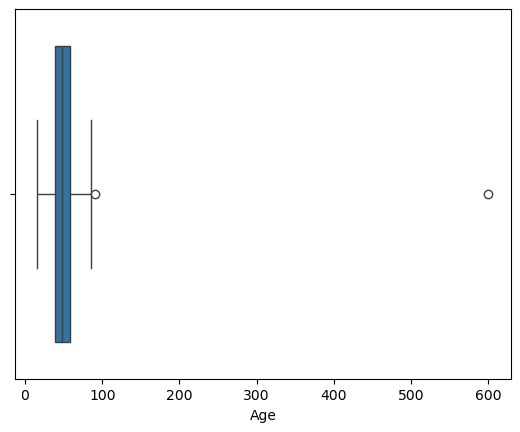

In [662]:
import seaborn as sns
sns.boxplot(x=df['Age'])

In [664]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
outliers

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
4,600.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
102,90.0,Female,No,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,Positive


In [666]:
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

<Axes: xlabel='Age'>

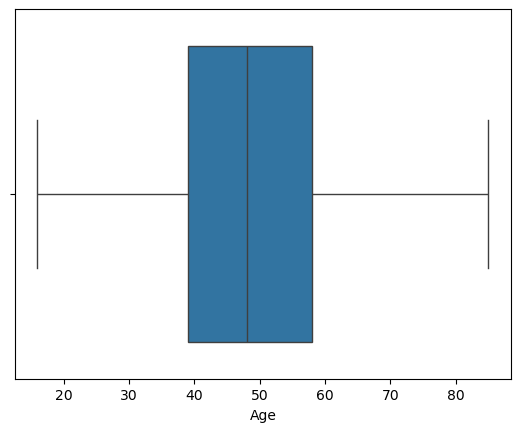

In [668]:
sns.boxplot(x=df['Age'])

In [670]:
df.shape

(247, 17)

In [672]:
df['class'].value_counts()

class
Positive    169
Negative     78
Name: count, dtype: int64

In [674]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
5,55.0,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57.0,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive


In [676]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Polyuria'] = le.fit_transform(df['Polyuria'])
df['Polydipsia'] = le.fit_transform(df['Polydipsia'])
df['sudden weight loss'] = le.fit_transform(df['sudden weight loss'])
df['weakness'] = le.fit_transform(df['weakness'])
df['Polyphagia'] = le.fit_transform(df['Polyphagia'])
df['Genital thrush'] = le.fit_transform(df['Genital thrush'])
df['visual blurring'] = le.fit_transform(df['visual blurring'])
df['Itching'] = le.fit_transform(df['Itching'])
df['Irritability'] = le.fit_transform(df['Irritability'])
df['delayed healing'] = le.fit_transform(df['delayed healing'])
df['partial paresis'] = le.fit_transform(df['partial paresis'])
df['muscle stiffness'] = le.fit_transform(df['muscle stiffness'])
df['Alopecia'] = le.fit_transform(df['Alopecia'])
df['Obesity'] = le.fit_transform(df['Obesity'])
df['class'] = le.fit_transform(df['class'])

In [678]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58.0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
3,45.0,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
5,55.0,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,57.0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1


In [680]:
df['class'].value_counts()

class
1    169
0     78
Name: count, dtype: int64

In [682]:
from sklearn.utils import shuffle
df = shuffle(df)

In [684]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
26,42.0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1
37,63.0,1,1,1,1,1,1,0,1,0,0,0,0,1,1,1,1
50,36.0,0,1,1,1,0,1,0,1,0,1,1,1,1,0,0,1
125,55.0,1,1,1,1,1,1,0,1,0,0,1,1,0,0,0,1
11,38.0,1,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1


In [686]:
df = df.reset_index()
df.head()

,index,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,26,42.0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1
1,37,63.0,1,1,1,1,1,1,0,1,0,0,0,0,1,1,1,1
2,50,36.0,0,1,1,1,0,1,0,1,0,1,1,1,1,0,0,1
3,125,55.0,1,1,1,1,1,1,0,1,0,0,1,1,0,0,0,1
4,11,38.0,1,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1


In [688]:
df = shuffle(df)
df.head()

,index,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
1,37,63.0,1,1,1,1,1,1,0,1,0,0,0,0,1,1,1,1
103,210,39.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
98,93,40.0,0,1,1,0,1,1,0,0,1,0,0,1,0,0,0,1
41,1,58.0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
226,319,34.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [690]:
x = df.drop(columns = ['class', 'index', 'age'])
y = df['class']

In [692]:
feature_names = x.columns.tolist()
print(feature_names)

['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']


In [694]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
scaled_x = std_scaler.fit_transform(x)

In [696]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size = 0.2)

print("train data size: ", len(y_train))

print("test data size: ", len(y_test))

train data size:  197
test data size:  50


# **Classification Models**

### Decision Tree

In [698]:
from sklearn import tree

dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [700]:
dt_pred = dt_clf.predict(x_test)
dt_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1])

## Evaluation Metrics

In [702]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

cm = confusion_matrix(y_test, dt_pred)
cm

array([[ 8,  2],
       [ 6, 34]], dtype=int64)

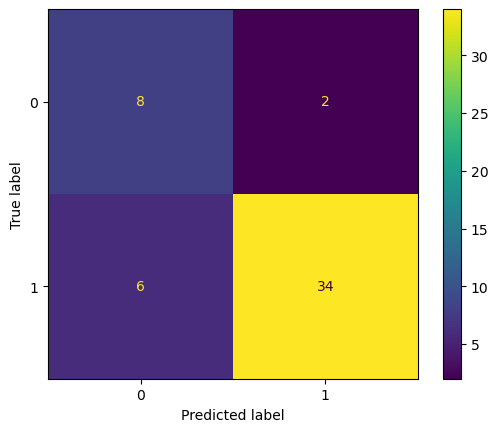

In [704]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

plt.show()

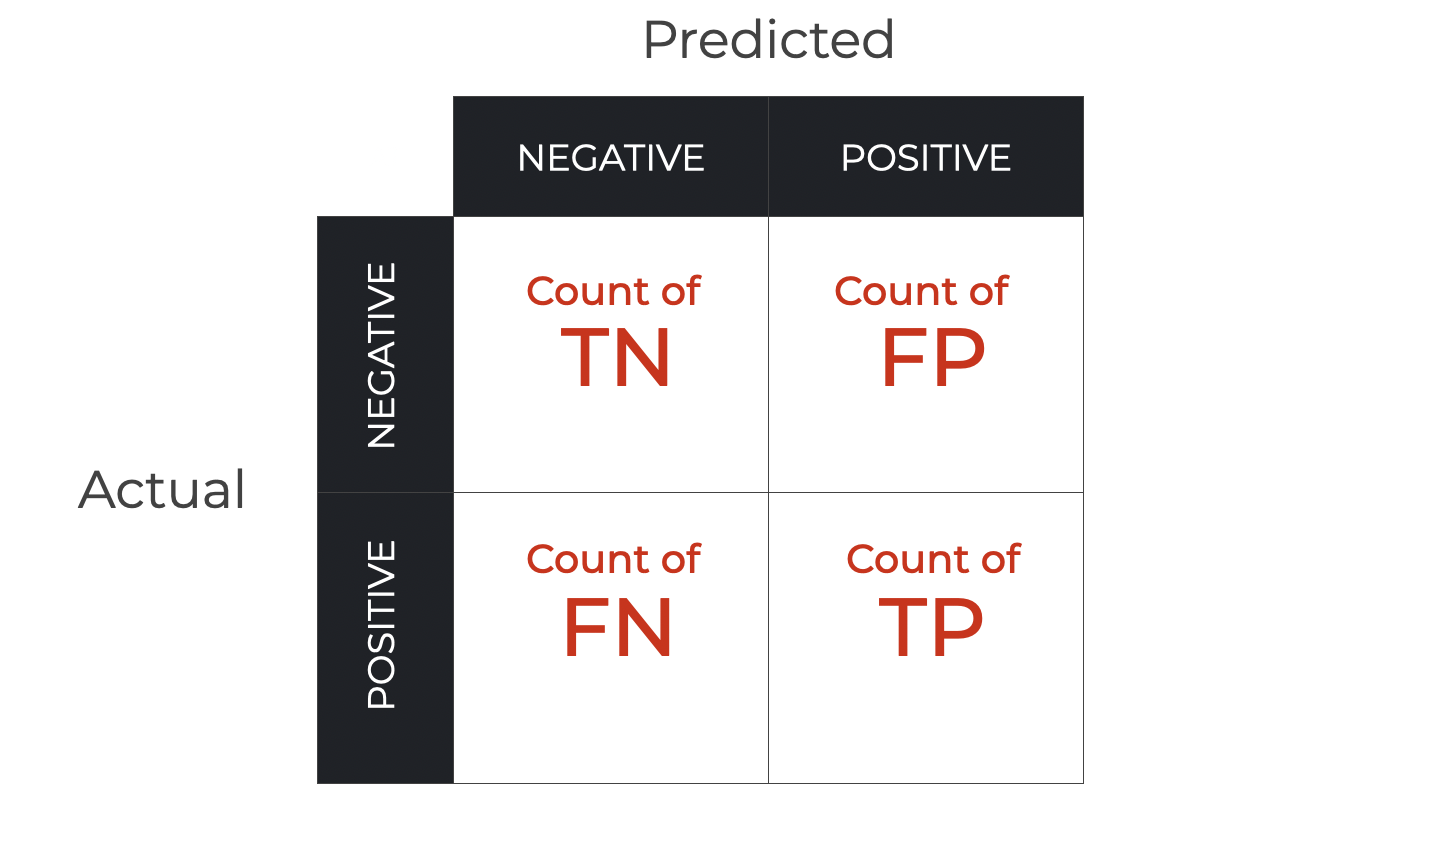

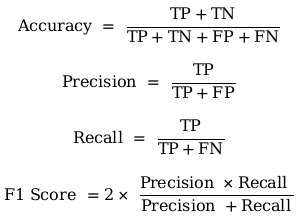

**Accuracy**: Indicates the overall effectiveness of the model. However, it can
be misleading in imbalanced datasets where one class dominates.

**Precision**: Measures the accuracy of the positive predictions. High precision indicates that the model predicts a positive class correctly.

> *Takes False Positives seriouly*

**Recall**: High recall means the model is effective at capturing positive cases.

> *Takes False Negatives seriouly*

> *Important in medical cases*

**F1 Score**: A higher F1 score indicates a better balance between precision and recall.

In [706]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

accuracy = accuracy_score(y_test, dt_pred)
precision = precision_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
recall = recall_score(y_test, dt_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')

Accuracy: 0.84
Precision: 0.9444444444444444
F1 Score: 0.8947368421052632
Recall: 0.85


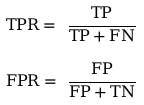

### ROC (Receiver Operating Characteristic) curve
**True Positive Rate (TPR)**: It measures the proportion of actual positives correctly identified.

**False Positive Rate (FPR)**: It measures the proportion of actual negatives incorrectly identified as positives.

***NOTE:***
1. *A curve closer to the top-left corner represents a better model.*
2. *A random guess results in a diagonal line (AUC = 0.5).*

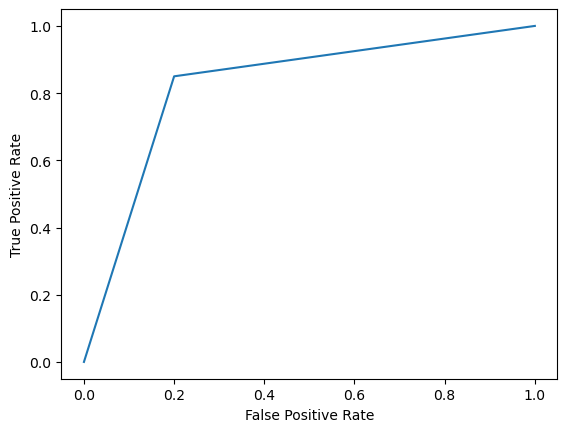

In [708]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, dt_pred)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [710]:
from sklearn.metrics import auc

auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.83


## Hyperparameter Tuning

In [712]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 50, 100],
    'min_samples_split': [5, 10, 15, 20, 25]
}

dt_clf = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 50, 100],
                         'min_samples_split': [5, 10, 15, 20, 25]},
             verbose=2)

In [714]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 50, 'min_samples_split': 5}


In [716]:
best_dt_clf = grid_search.best_estimator_
best_dt_clf

DecisionTreeClassifier(criterion='entropy', max_depth=50, min_samples_split=5)

In [718]:
dt_pred = best_dt_clf.predict(x_test)

accuracy = accuracy_score(y_test, dt_pred)
precision = precision_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
recall = recall_score(y_test, dt_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')

Accuracy: 0.9
Precision: 0.972972972972973
F1 Score: 0.935064935064935
Recall: 0.9


# Random Forest

In [720]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [722]:
rf_pred = rf_clf.predict(x_test)
rf_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1])

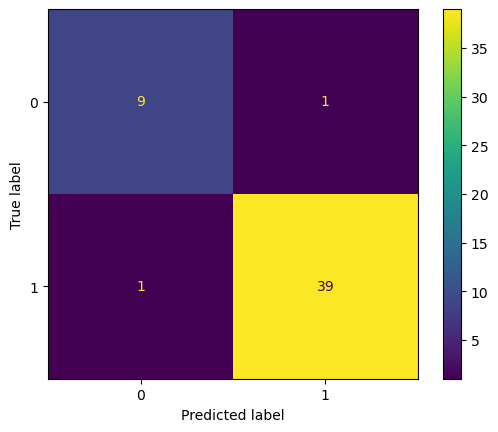

In [724]:
cm = confusion_matrix(y_test, rf_pred)

display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

plt.show()

In [726]:
accuracy = accuracy_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
recall = recall_score(y_test, rf_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')

Accuracy: 0.96
Precision: 0.975
F1 Score: 0.975
Recall: 0.975


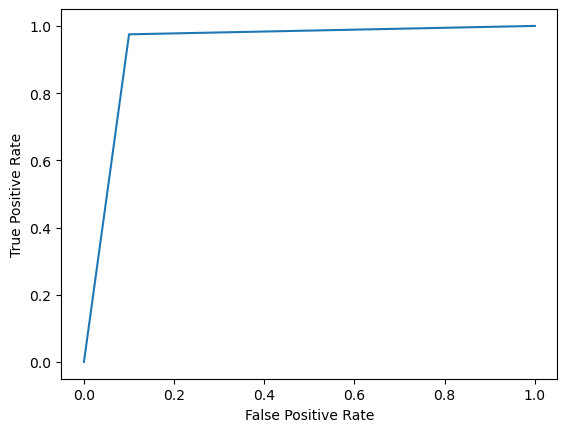

In [728]:
fpr, tpr, _ = roc_curve(y_test, rf_pred)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [730]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.94


## XGBoost

In [732]:
!pip install xgboost

In [734]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [736]:
xgb_pred = xgb_clf.predict(x_test)
xgb_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1])

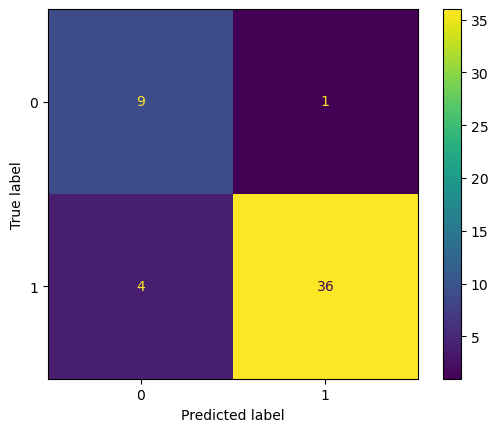

In [738]:
cm = confusion_matrix(y_test, xgb_pred)

display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

plt.show()

In [742]:
accuracy = accuracy_score(y_test, xgb_pred)
precision = precision_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
recall = recall_score(y_test, xgb_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')

Accuracy: 0.9
Precision: 0.972972972972973
F1 Score: 0.935064935064935
Recall: 0.9


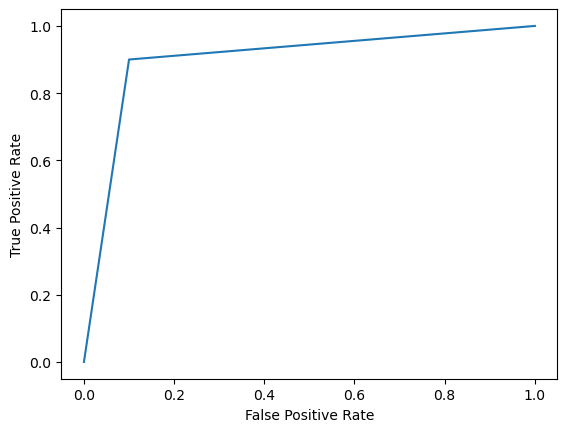

In [744]:
fpr, tpr, _ = roc_curve(y_test, xgb_pred)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [746]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.90


## K Nearest Neighbor (KNN)

In [748]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [750]:
knn_pred = knn.predict(x_test)
knn_pred

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0])

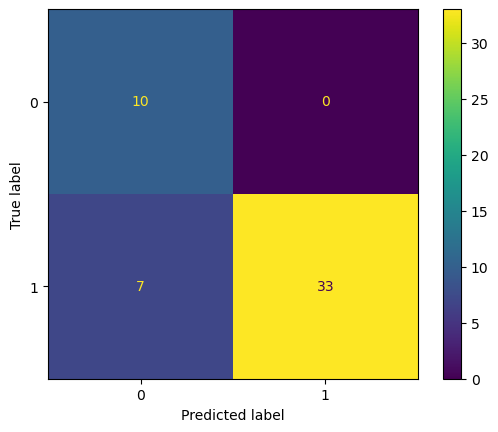

In [754]:
cm = confusion_matrix(y_test, knn_pred)

display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

plt.show()

In [756]:
accuracy = accuracy_score(y_test, knn_pred)
precision = precision_score(y_test, knn_pred)
f1 = f1_score(y_test, knn_pred)
recall = recall_score(y_test, knn_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')

Accuracy: 0.86
Precision: 1.0
F1 Score: 0.9041095890410958
Recall: 0.825


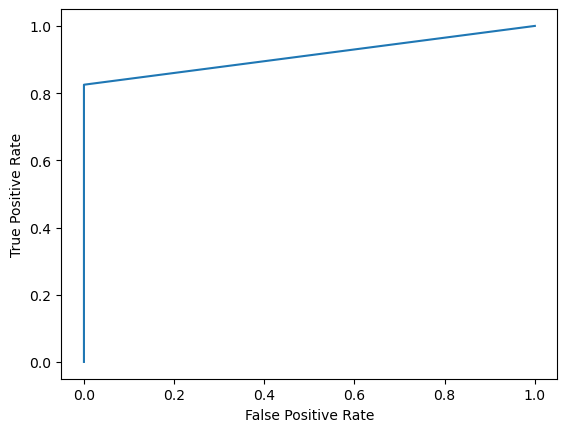

In [758]:
fpr, tpr, _ = roc_curve(y_test, knn_pred)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [760]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.91


## Feature Importance

In [762]:
feature_names

['Age',
 'Gender',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity']

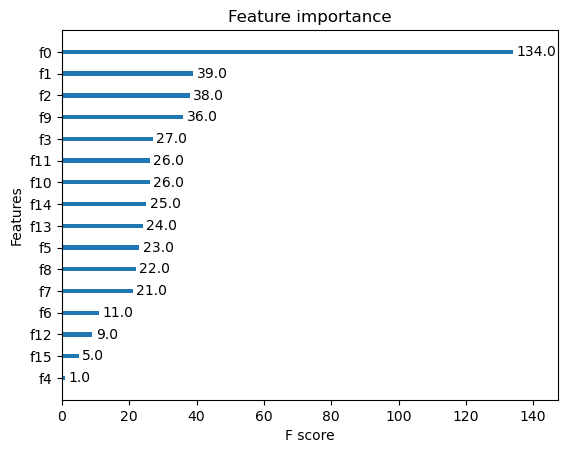

In [764]:
from xgboost import plot_importance
from matplotlib import pyplot

ax = plot_importance(xgb_clf)
# ax.set_yticklabels(feature_names)
pyplot.grid(False)
pyplot.show()

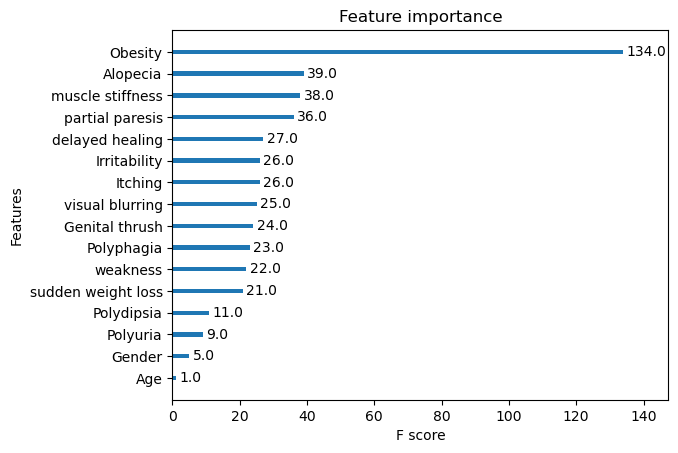

In [766]:
ax = plot_importance(xgb_clf)
ax.set_yticklabels(feature_names)
pyplot.grid(False)
pyplot.show()